# Tutorial
---

### Logistic Regression Explained
- A linear regression model predicts a value of the targeted variable through a linear combination of the given features.
- Logistic regression predicts a probability value through a linear combination of the given features plugged into a logistic function (inverse logit)
- The logistic function log(p/1-p) is a simple strategy to map the linear combionation of z lying in the -inf, inf range to the probability interval of [0,1].  Here "z" is the log(odd) or logit or log(p/1-p).
- In the logistic regression model the predicted value or the range of the mapping is confined to [0,1]
- The logit function log(p/1-p) could transform the probability space of [0,1] to a space stretching to (-inf, inf)

#### Logistic Regression Method
- Map class probability [0,1] vs variable {R} or our x values to a space of logit{R} vs variable {R}, which is a fancy way of saying we apply the logist fucntion log(p/1-p) to the y axis or y values?
- Once transformed, we perform a regression like fitting by adjusting the coefficients and slope in order to maximize the likelihood
- We then remap Logit{R} vs variable {R} back to class probability [0,1] vs variable{R} using the inverse of the logit function.
- Iteratively performing this cycle A > B > A would result in the best fitting sqiggly line.

#### Insights
- The reason we transform a space of 0,1 to -inf,inf is because it will make the fitting problem very close to solving a linear regression problem.



### References
- https://www.analyticsvidhya.com/blog/2022/02/implementing-logistic-regression-from-scratch-using-python/
- https://link.medium.com/lRXrg4FP6yb




### Import Libaries

In [54]:
import os
import pandas as pd
import numpy as np
from numpy import log, dot, e, shape
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split  


<b>

---
## Visualizing The Transformation
---

<b>

### Plot Sample Data

In [41]:
sample_df = pd.DataFrame({
    "x": [5.6, 5.6, 5.5, 4.9, 5.0, 5.8, 5.6, 5.0, 4.9, 5.4],
    "y": [0, 0, 1, 1, 1, 0, 0, 1, 1, 1]
})

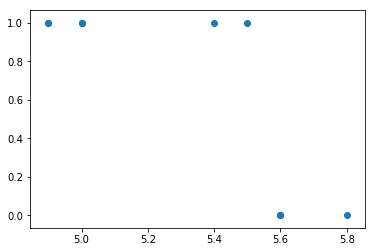

In [42]:
plt.scatter(x=sample_df.x, y=sample_df.y)
plt.show()

### Generate Sample Probabilities w/ range [1,0]

In [43]:
prob = np.arange(start=0, stop=1, step=0.01)

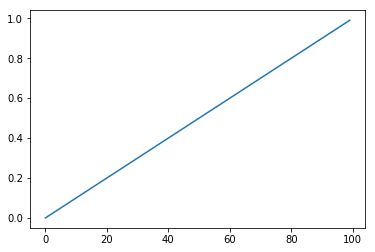

In [44]:
plt.plot(prob)
plt.show()

### Calculate the Odds Ratio

In [45]:
odds = prob / (1-prob)

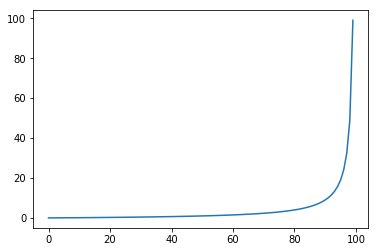

In [46]:
plt.plot(odds)
plt.show()

### Calculate Log Odds

In [47]:
log_odds = np.log(odds)

/Users/ccirelli2/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


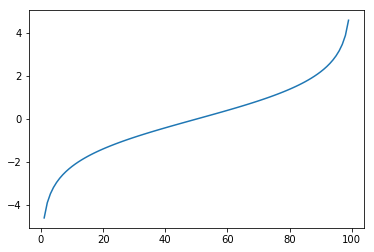

In [48]:
plt.plot(log_odds)
plt.show()

### Visualizate All Data in DataFrame

In [49]:
df_comp = pd.DataFrame({
    "Prob": prob,
    "Odds": odds,
    "Log_Odds": log_odds
})

In [51]:
df_comp[["Prob", "Odds", "Log_Odds"]]

,Prob,Odds,Log_Odds
0,0.00,0.000000,-inf
1,0.01,0.010101,-4.595120
2,0.02,0.020408,-3.891820
3,0.03,0.030928,-3.476099
4,0.04,0.041667,-3.178054
5,0.05,0.052632,-2.944439
6,0.06,0.063830,-2.751535
7,0.07,0.075269,-2.586689
8,0.08,0.086957,-2.442347
9,0.09,0.098901,-2.313635


<b>

---
## Train Model From Scratch
---

<b>

### Generate Dataset

In [56]:
X,y = make_classification(n_features = 4,n_classes=2)

### Crate Train Test Split

In [ ]:
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)

print(X_tr.shape, X_te.shape)